# Import Module and Download Pretrained Model

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torchvision.transforms as T
from torchvision import models
import numpy as np
import cv2

In [2]:
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True).eval()

In [3]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Object Detection

In [ ]:
!wget https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/10best-cars-group-cropped-1542126037.jpg -O cars.jpg

img = Image.open('./cars.jpg')
transform = T.Compose([T.ToTensor()])
img = transform(img)

In [23]:
pred = model([img])
pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
pred_score = list(pred[0]['scores'].detach().numpy())
pred_t = [pred_score.index(x) for x in pred_score if x > 0.8][-1]
pred_boxes = pred_boxes[:pred_t+1]
pred_class = pred_class[:pred_t+1]

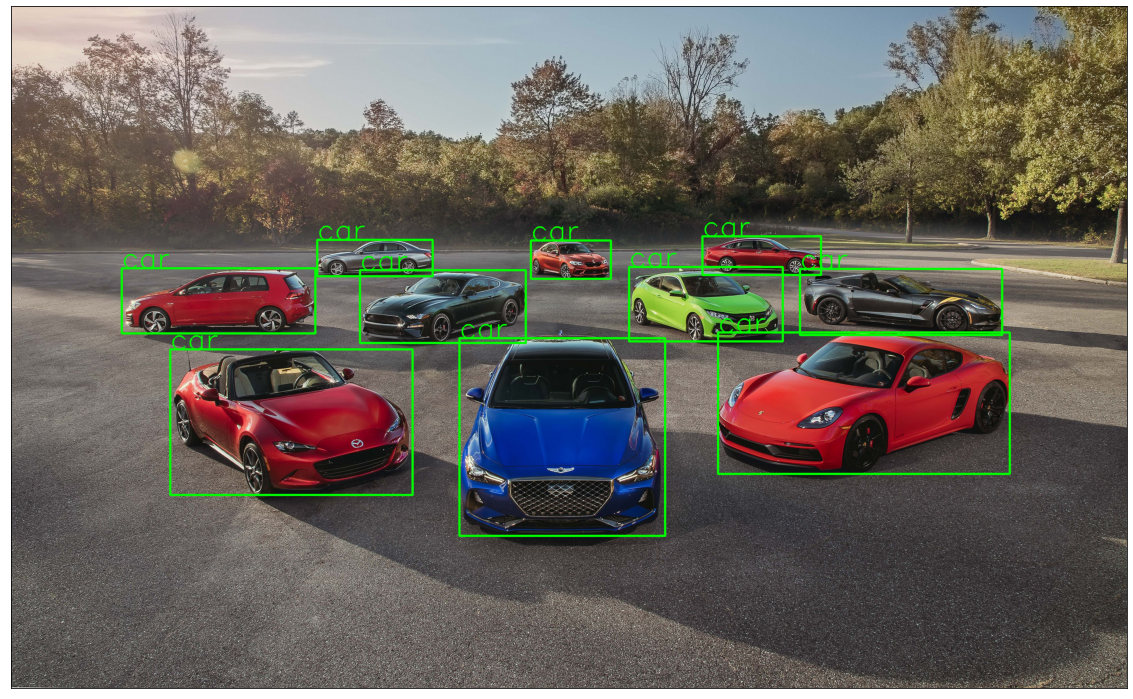

In [28]:
img = cv2.imread('./cars.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for i in range(len(pred_boxes)):
    cv2.rectangle(img, pred_boxes[i][0], pred_boxes[i][1], color=(0, 255, 0), thickness=5)
    cv2.putText(img, pred_class[i], pred_boxes[i][0], cv2.FONT_HERSHEY_SIMPLEX, 3, (0,255,0), thickness=3)

plt.figure(figsize=(20,20))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

# Function for Object Detection

In [41]:
def get_prediction(img_path, threshold):
    img = Image.open(img_path)
    transform = T.Compose([T.ToTensor()])
    img = transform(img)

    pred = model([img])
    pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
    pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
    pred_score = list(pred[0]['scores'].detach().numpy())
    pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1]
    pred_boxes = pred_boxes[:pred_t+1]
    pred_class = pred_class[:pred_t+1]

    return pred_boxes, pred_class

def detect_object(img_path, threshold, ret_thick, text_size):
    pred_boxes, pred_class = get_prediction(img_path, threshold)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for i in range(len(pred_boxes)):
        cv2.rectangle(img, pred_boxes[i][0], pred_boxes[i][1], color=(0, 255, 0), thickness=ret_thick)
        cv2.putText(img, pred_class[i], pred_boxes[i][0], cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0), thickness=2)

    plt.figure(figsize=(20,20))
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

--2020-12-07 13:12:49--  https://sporttechie-prod.s3.amazonaws.com/2019/09/rafael-nadal-us-open.png
Resolving sporttechie-prod.s3.amazonaws.com (sporttechie-prod.s3.amazonaws.com)... 52.218.137.227
Connecting to sporttechie-prod.s3.amazonaws.com (sporttechie-prod.s3.amazonaws.com)|52.218.137.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1179657 (1.1M) [image/png]
Saving to: ‘nadal.jpg’

nadal.jpg           100%[===================>]   1.12M  --.-KB/s    in 0.08s   

2020-12-07 13:12:49 (13.9 MB/s) - ‘nadal.jpg’ saved [1179657/1179657]



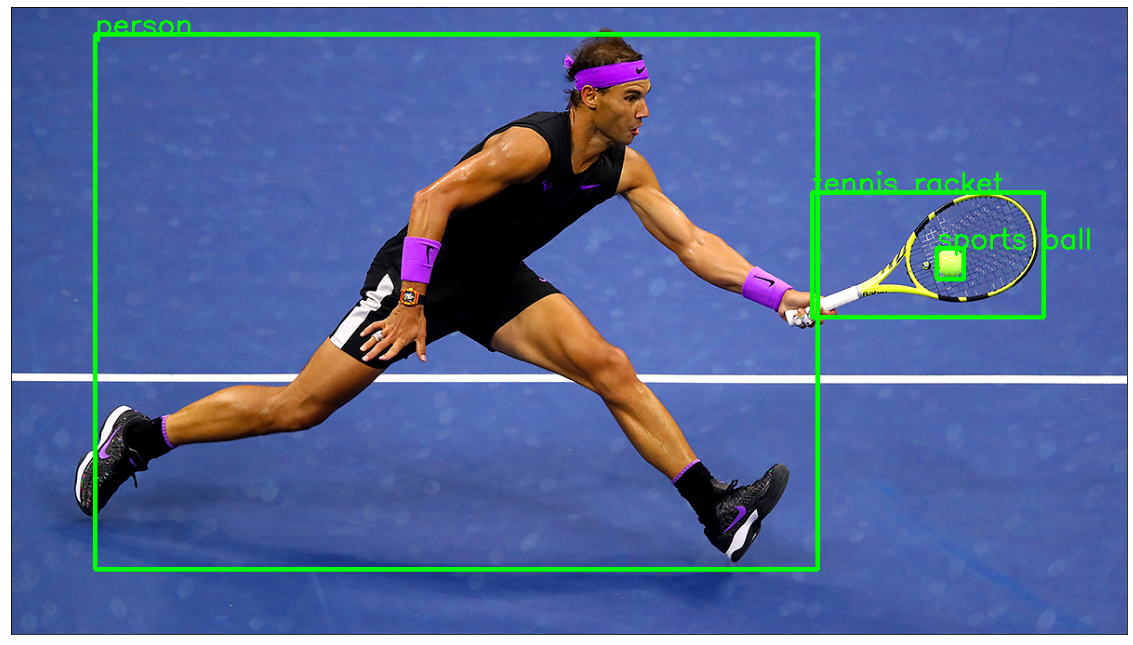

In [42]:
!wget https://sporttechie-prod.s3.amazonaws.com/2019/09/rafael-nadal-us-open.png -O nadal.jpg

detect_object('./nadal.jpg', 0.8, 3, 1)